In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## **Linearly Seperable - *IRIS DATASET***

In [2]:
iris = datasets.load_iris()
X_iris, y_iris = iris.data, iris.target  # Use all features

In [3]:
scaler_iris = StandardScaler()
X_iris = scaler_iris.fit_transform(X_iris)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

svm_iris = SVC(kernel='linear', decision_function_shape='ovr')  # One-vs-Rest (OvR)
svm_iris.fit(X_train, y_train)

y_pred_iris = svm_iris.predict(X_test)
print(f"Iris SVM Accuracy: {accuracy_score(y_test, y_pred_iris):.2f}")
print(classification_report(y_test, y_pred_iris))

Iris SVM Accuracy: 0.97
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



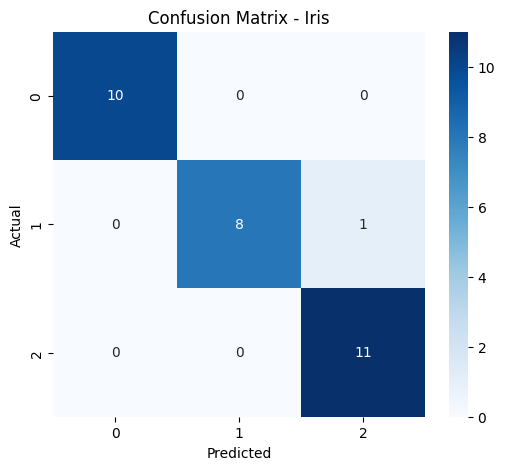

In [6]:
 def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

plot_confusion_matrix(y_test, y_pred_iris, "Confusion Matrix - Iris")

## **Non-Linearly Seperable => *DIGITS DATASET***

In [7]:
digits = datasets.load_digits()
X_digits, y_digits = digits.data, digits.target  # 8x8 image flattened to 64 features

In [8]:
scaler_digits = StandardScaler()
X_digits = scaler_digits.fit_transform(X_digits)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, test_size=0.2, random_state=42)

svm_digits = SVC(kernel='rbf', decision_function_shape='ovo')  # Uses One-vs-One (OvO) for
svm_digits.fit(X_train, y_train)

y_pred_digits = svm_digits.predict(X_test)
print(f"Digits SVM Accuracy: {accuracy_score(y_test, y_pred_digits):.2f}")
print(classification_report(y_test, y_pred_digits))


Digits SVM Accuracy: 0.98
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      0.97      0.99        34
           4       0.96      1.00      0.98        46
           5       0.96      0.98      0.97        47
           6       0.97      1.00      0.99        35
           7       1.00      0.94      0.97        34
           8       0.97      0.97      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



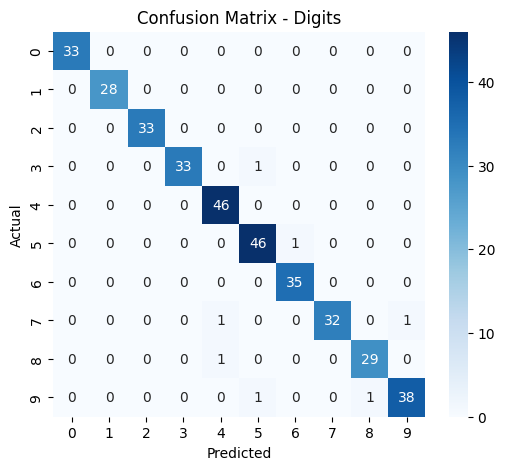

In [13]:
plot_confusion_matrix(y_test, y_pred_digits, "Confusion Matrix - Digits")